In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
summaryPd = None
summaryPd = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])

nbCibles = 5
# NUMCONDITION: 1 -> 4-8-16; 2 -> 8-16-4; 3 -> 16-4-8; 4 -> 4-16-8; 5 -> 8-4-16; 6 -> 16-8-4
numCondition = 1
name = 'Bloc'

path = 'DataSimulation/Elodie_5cibles_10blocs/'
path2 = ''
contribMin = 0.0
contribMax = 0.5
increment = 0.05


In [15]:
accuracySummary = None
accuracySummary = pd.DataFrame()

accuracyTarget = None
accuracyTarget = pd.DataFrame()

for i in range(int(contribMin*1000), int(contribMax*1000 + increment*1000), int(increment*1000)):
    contribDist = i
    contribAngle = 1000 - contribDist
    
# FOR I IN RANGE CONTRIBMIN CONTRIBMAX INCREMENT 0.05: do all and get summary
    contribDist = contribDist/1000
    contribAngle = contribAngle/1000
    Contrib01 = None
    Contrib01 = pd.read_csv(path + str(contribDist) + '-' + str(contribAngle) + path2 + '.csv', sep = ";", decimal = ',')
#     Contrib01 = Contrib01.dropna()
    
    contribDist = float(contribDist)
    contribAngle = float(contribAngle)
    
    list_names = Contrib01.columns.values
    for i in range(0, math.floor(Contrib01.columns.size/2)):
        del Contrib01[list_names[2*i]]

        Contrib01.columns.values[i] = list_names[2*i]
        Contrib01.index = Contrib01['Time']
    del Contrib01['Time']

    accuracyCoVR = None
    targetCoVR = None
    
    accuracyCoVR = pd.DataFrame()
    targetCoVR = pd.DataFrame()
    
    Contrib01['Weight_OOI_Picked'] = [contribDist*(1/(1 + float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_Dist'].values[i])) + contribAngle*math.exp(3*math.cos(float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_Angle'].values[i])) - 1)) for i in range(0, Contrib01.index.size)]
    Contrib01['WeightUnityOOIPicked'] = [float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_weight'].values[i]) for i in range(0, Contrib01.index.size)]

    Contrib01['UserXZ'] = [float(Contrib01['PosUserZ'].values[i])**2 + float(Contrib01['PosUserX'].values[i])**2 for i in range(0, Contrib01.index.size)]
    Contrib01['ProxyXZ'] = [float(Contrib01['PosProxyX'].values[i])**2 + float(Contrib01['PosProxyZ'].values[i])**2 for i in range(0, Contrib01.index.size)]
    Contrib01['PosCoVR_EncXZ'] = [float(Contrib01['PosCoVR_EncX'].values[i])**2 + float(Contrib01['PosCoVR_EncZ'].values[i])**2 for i in range(0,Contrib01.index.size)]
    #Contrib01['Vitesse'] = [(Contrib01['PosCoVR_EncXZ'].values[i] - Contrib01['PosCoVR_EncXZ'].values[i-1])/(float(Contrib01.index.values[i]) - float(Contrib01.index.values[i-1])) for i in range(0, Contrib01.index.size)]
    #print(Contrib01['Vitesse'])
    
    Comparison = None
    Comparison = pd.DataFrame()

    j = 0
    k = 0
    time_diff = 0
    list_time = []
    list_i = []
    for i in range(200, Contrib01.index.size):
        if(float(Contrib01['WeightUnityOOIPicked'].values[i]) == 1) and (float(Contrib01['WeightUnityOOIPicked'].values[i-1]) != 1):
            k = float(Contrib01.index.values[i])
        if (float(Contrib01['TargetToTouch.x'].values[i]) != float(Contrib01['TargetToTouch.x'].values[i-1])):
            j = j + 1
            list_i.append(i-1)
            time_diff = float(Contrib01.index.values[i]) - k
            list_time.append(time_diff)
            #print(Contrib01.index.values[j], k, time_diff, j)
    #        Comparison['MaxSpeed'] = float(Contrib01['Vitesse'].values[i])
    #j
    #Comparison['MaxSpeed'] = [float(Contrib01['Vitesse'][Contrib01.index.values[list_i[i-1]]:Contrib01.index.values[list_i[i]]].max()) for i in range(1,j)]

    Comparison['PosTargetToTouch'] = [float(Contrib01['TargetToTouch.x'].values[list_i[i]])**2 + float(Contrib01['TargetToTouch.z'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosUserXZ'] = [float(Contrib01['PosUserX'].values[list_i[i]])**2 + float(Contrib01['PosUserZ'].values[list_i[i]])**2 for i in range(0,j)]
    #Comparison['PosHandUser'] = Contrib01['PosUserX']**2 + Contrib01['PosUserZ']**2
    # MEASURE DISTANCE POSHANDUSER AND CoVROPT
    Comparison['PosHandUserXZ'] = [float(Contrib01['PosHandX'].values[list_i[i]])**2 + float(Contrib01['PosHandZ'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosHandOptXZ'] = [float(Contrib01['PosHandOptX'].values[list_i[i]])**2 + float(Contrib01['PosHandOptZ'].values[list_i[i]])**2 for i in range(0,j)]

    Comparison['PosCoVR_EncXZ'] = [float(Contrib01['PosCoVR_EncX'].values[list_i[i]])**2 + float(Contrib01['PosCoVR_EncZ'].values[list_i[i]])**2 for i in range(0,j)]
    #Comparison['PosCoVR_OptXZ'] = [Contrib01['PosCoVR_OptX'].values[list_i[i]]**2 + Contrib01['PosCoVR_OptZ'].values[list_i[i]]**2 for i in range(0,j)]

    Comparison['DistanceToTarget'] = Comparison['PosTargetToTouch'] - Comparison['PosCoVR_EncXZ']
    #Comparison['DistanceProxyCoVR'] = [Contrib01['PosTargetX'].values[list_i[i]]**2 + Contrib01['PosTargetZ'].values[list_i[i]]**2 - Comparison['PosCoVR_EncXZ'].values[i] for i in range(0,j)]

    Comparison['DistanceProxyTargetCoVR'] = [float(Contrib01['PosProxyX'].values[list_i[i]])**2 + float(Contrib01['PosProxyZ'].values[list_i[i]])**2 - Comparison['PosCoVR_EncXZ'].values[i] for i in range(0,j)]
    Comparison['AbsoluteDistanceToTarget'] = Comparison['DistanceToTarget'].abs()
    Comparison['AbsoluteDistanceProxCoVR'] = Comparison['DistanceProxyTargetCoVR'].abs()

    Comparison['AbsoluteDist_Hand_CoVR'] = Comparison['PosHandUserXZ'] - Comparison['PosCoVR_EncXZ']
    Comparison['AbsoluteDist_Hand_CoVR'] = Comparison['AbsoluteDist_Hand_CoVR'].abs()


    #Comparison['AbsoluteDist_Hand_CoVR_Opt'] = Comparison['PosHandOptXZ'] - Comparison['PosCoVR_OptXZ']
    #Comparison['AbsoluteDist_Hand_CoVR_Opt'] = Comparison['AbsoluteDist_Hand_CoVR_Opt'].abs()
    Comparison['WeightUnity'] = [float(Contrib01['WeightUnityOOIPicked'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['TimeDiffIntentionKnown'] = [list_time[i] for i in range(0,j)]
    #GET I FOR WEIGHT = 1, MEASURE TIME DIFFERENCE

    cond_inPlace = (Comparison['AbsoluteDistanceToTarget'] <= 0.1)
    Comparison['BoolInPlace'] = cond_inPlace
    # SUMMARY: cond_inPlace valuecounts
    tauxReussite = cond_inPlace.value_counts()/cond_inPlace.shape * 100
    j
    #print(Comparison['TimeDiffIntentionKnown'])
    dict_Dist = {}
    dict_Dist = {Comparison['AbsoluteDistanceProxCoVR'].describe().index[i] : Comparison['AbsoluteDistanceProxCoVR'].describe().values[i] for i in range(0, Comparison.describe().index.size)}
    #print(dict)
    accuracyCoVR = pd.DataFrame.from_dict(dict_Dist, orient = 'index')
    accuracyCoVR.columns = [contribDist]
    
    dict_Target = {}
    dict_Target = {Comparison['AbsoluteDistanceToTarget'].describe().index[i] : Comparison['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, Comparison.describe().index.size)}

    targetCoVR = pd.DataFrame.from_dict(dict_Target, orient = 'index')
    targetCoVR.columns = [contribDist]    
    
    
    accuracySummary = accuracySummary.append(accuracyCoVR.transpose())
    accuracyTarget = accuracyTarget.append(targetCoVR.transpose())
    print(Comparison)
    #pd.DataFrame(dict_Dist, index = Comparison['AbsoluteDistanceProxCoVR'].describe().index)
    summaryPd.loc[contribDist] = pd.Series({'SuccessRate' : tauxReussite[True], 'MeanDistanceTarget' : Comparison['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : Comparison['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : Comparison['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : Comparison['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : Comparison['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : j})
summaryPd
accuracySummary = accuracySummary.transpose()
accuracyTarget = accuracyTarget.transpose()

summaryPd

    PosTargetToTouch  PosUserXZ  PosHandUserXZ  PosHandOptXZ  PosCoVR_EncXZ  \
0           0.577821   1.191024       0.611413      1.388890        4.18296   
1           0.732684   0.095906       0.655751      0.267872        4.18296   
2           1.383745   0.605499       1.284988      0.940515        4.18296   
3           0.019173   0.303077       0.013684      0.581979        4.18296   
4           0.441885   1.440797       0.490675      1.613662        4.18296   
5           1.204191   0.999461       1.176253      1.323126        4.18296   
6           0.343057   1.000373       1.181625      1.309196        4.18296   
7           1.548582   0.999085       1.178308      1.316394        4.18296   
8           0.443131   0.992224       1.083564      1.386356        4.18296   
9           1.204613   0.992656       1.061094      1.424931        4.18296   
10          0.730354   0.994162       1.047050      1.475028        4.18296   
11          0.471801   0.996070       1.045555      

    PosTargetToTouch  PosUserXZ  PosHandUserXZ  PosHandOptXZ  PosCoVR_EncXZ  \
0           0.577821   1.191024       0.611413      1.388890        4.18296   
1           0.732684   0.095906       0.655751      0.267872        4.18296   
2           1.383745   0.605499       1.284988      0.940515        4.18296   
3           0.019173   0.303077       0.013684      0.581979        4.18296   
4           0.441885   1.440797       0.490675      1.613662        4.18296   
5           1.204191   0.999461       1.176253      1.323126        4.18296   
6           0.343057   1.000373       1.181625      1.309196        4.18296   
7           1.548582   0.999085       1.178308      1.316394        4.18296   
8           0.443131   0.992224       1.083564      1.386356        4.18296   
9           1.204613   0.992656       1.061094      1.424931        4.18296   
10          0.730354   0.994162       1.047050      1.475028        4.18296   
11          0.471801   0.996070       1.045555      

    PosTargetToTouch  PosUserXZ  PosHandUserXZ  PosHandOptXZ  PosCoVR_EncXZ  \
0           0.577821   1.191024       0.611413      1.388890        4.18296   
1           0.732684   0.095906       0.655751      0.267872        4.18296   
2           1.383745   0.605499       1.284988      0.940515        4.18296   
3           0.019173   0.303077       0.013684      0.581979        4.18296   
4           0.441885   1.440797       0.490675      1.613662        4.18296   
5           1.204191   0.999461       1.176253      1.323126        4.18296   
6           0.343057   1.000373       1.181625      1.309196        4.18296   
7           1.548582   0.999085       1.178308      1.316394        4.18296   
8           0.443131   0.992224       1.083564      1.386356        4.18296   
9           1.204613   0.992656       1.061094      1.424931        4.18296   
10          0.730354   0.994162       1.047050      1.475028        4.18296   
11          0.471801   0.996070       1.045555      

    PosTargetToTouch  PosUserXZ  PosHandUserXZ  PosHandOptXZ  PosCoVR_EncXZ  \
0           0.577821   1.191024       0.611413      1.388890        4.18296   
1           0.732684   0.095906       0.655751      0.267872        4.18296   
2           1.383745   0.605499       1.284988      0.940515        4.18296   
3           0.019173   0.303077       0.013684      0.581979        4.18296   
4           0.441885   1.440797       0.490675      1.613662        4.18296   
5           1.204191   0.999461       1.176253      1.323126        4.18296   
6           0.343057   1.000373       1.181625      1.309196        4.18296   
7           1.548582   0.999085       1.178308      1.316394        4.18296   
8           0.443131   0.992224       1.083564      1.386356        4.18296   
9           1.204613   0.992656       1.061094      1.424931        4.18296   
10          0.730354   0.994162       1.047050      1.475028        4.18296   
11          0.471801   0.996070       1.045555      

    PosTargetToTouch  PosUserXZ  PosHandUserXZ  PosHandOptXZ  PosCoVR_EncXZ  \
0           0.577821   1.191024       0.611413      1.388890        4.18296   
1           0.732684   0.095906       0.655751      0.267872        4.18296   
2           1.383745   0.605499       1.284988      0.940515        4.18296   
3           0.019173   0.303077       0.013684      0.581979        4.18296   
4           0.441885   1.440797       0.490675      1.613662        4.18296   
5           1.204191   0.999461       1.176253      1.323126        4.18296   
6           0.343057   1.000373       1.181625      1.309196        4.18296   
7           1.548582   0.999085       1.178308      1.316394        4.18296   
8           0.443131   0.992224       1.083564      1.386356        4.18296   
9           1.204613   0.992656       1.061094      1.424931        4.18296   
10          0.730354   0.994162       1.047050      1.475028        4.18296   
11          0.471801   0.996070       1.045555      

    PosTargetToTouch  PosUserXZ  PosHandUserXZ  PosHandOptXZ  PosCoVR_EncXZ  \
0           0.577821   1.191024       0.611413      1.388890        4.18296   
1           0.732684   0.095906       0.655751      0.267872        4.18296   
2           1.383745   0.605499       1.284988      0.940515        4.18296   
3           0.019173   0.303077       0.013684      0.581979        4.18296   
4           0.441885   1.440797       0.490675      1.613662        4.18296   
5           1.204191   0.999461       1.176253      1.323126        4.18296   
6           0.343057   1.000373       1.181625      1.309196        4.18296   
7           1.548582   0.999085       1.178308      1.316394        4.18296   
8           0.443131   0.992224       1.083564      1.386356        4.18296   
9           1.204613   0.992656       1.061094      1.424931        4.18296   
10          0.730354   0.994162       1.047050      1.475028        4.18296   
11          0.471801   0.996070       1.045555      

    PosTargetToTouch  PosUserXZ  PosHandUserXZ  PosHandOptXZ  PosCoVR_EncXZ  \
0           0.577821   1.191024       0.611413      1.388890        4.18296   
1           0.732684   0.095906       0.655751      0.267872        4.18296   
2           1.383745   0.605499       1.284988      0.940515        4.18296   
3           0.019173   0.303077       0.013684      0.581979        4.18296   
4           0.441885   1.440797       0.490675      1.613662        4.18296   
5           1.204191   0.999461       1.176253      1.323126        4.18296   
6           0.343057   1.000373       1.181625      1.309196        4.18296   
7           1.548582   0.999085       1.178308      1.316394        4.18296   
8           0.443131   0.992224       1.083564      1.386356        4.18296   
9           1.204613   0.992656       1.061094      1.424931        4.18296   
10          0.730354   0.994162       1.047050      1.475028        4.18296   
11          0.471801   0.996070       1.045555      

FileNotFoundError: [Errno 2] File b'DataSimulation/Elodie_5cibles_10blocs/0.35-0.65.csv' does not exist: b'DataSimulation/Elodie_5cibles_10blocs/0.35-0.65.csv'

In [11]:
# WRITE FILE WITH USER ID AND SUMMARY
summaryPd

Empty DataFrame
Columns: [SuccessRate, MeanDistanceTarget, StdDistanceTarget, MeanDistCoVRHandVirt, StdDistCoVRHandVirt, TimeIntentionKnown, CheckNbTargets, MaxSpeed]
Index: []

In [16]:
accuracySummary

count      mean       std       min       25%       50%       75%  \
0.00   49.0  3.762290  0.341312  2.602221  3.516839  3.795871  4.034361   
0.05   49.0  3.796933  0.329562  2.647758  3.568209  3.900879  4.036333   
0.10   49.0  3.810765  0.314851  2.691116  3.638244  3.934892  4.034235   
0.15   49.0  3.829373  0.306380  2.733924  3.676117  3.943710  4.034996   
0.20   49.0  3.847959  0.299011  2.774174  3.720043  3.951187  4.034927   
0.25   49.0  3.862334  0.292218  2.801049  3.760514  3.959787  4.044098   
0.30   49.0  3.877545  0.284887  2.801216  3.779602  3.967189  4.052099   

           max  
0.00  4.160952  
0.05  4.182807  
0.10  4.169678  
0.15  4.172093  
0.20  4.173712  
0.25  4.174822  
0.30  4.175053

In [17]:
accuracyTarget

count      mean       std       min       25%       50%       75%  \
0.00   49.0  3.409121  0.498238  2.056677  2.978769  3.452606  3.738701   
0.05   49.0  3.409121  0.498238  2.056677  2.978769  3.452606  3.738701   
0.10   49.0  3.409121  0.498238  2.056677  2.978769  3.452606  3.738701   
0.15   49.0  3.409121  0.498238  2.056677  2.978769  3.452606  3.738701   
0.20   49.0  3.409121  0.498238  2.056677  2.978769  3.452606  3.738701   
0.25   49.0  3.409121  0.498238  2.056677  2.978769  3.452606  3.738701   
0.30   49.0  3.409121  0.498238  2.056677  2.978769  3.452606  3.738701   

           max  
0.00  4.163788  
0.05  4.163788  
0.10  4.163788  
0.15  4.163788  
0.20  4.163788  
0.25  4.163788  
0.30  4.163788

In [92]:
summaryPd.to_csv('./SummarySimulation/' + str(nbCibles) +'Cibles-Condition#'+ str(numCondition) +'-User#'+ name +'_MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%-Summary.csv')
accuracyTarget.to_csv('./SummarySimulation/' + str(nbCibles) +'Cibles-Condition#'+ str(numCondition) +'-User#'+ name +'_MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%-DistToTarget.csv')
accuracyCoVR.to_csv('./SummarySimulation/' + str(nbCibles) +'Cibles-Condition#'+ str(numCondition) +'-User#'+ name +'_MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%-AccuracyCoVR.csv')



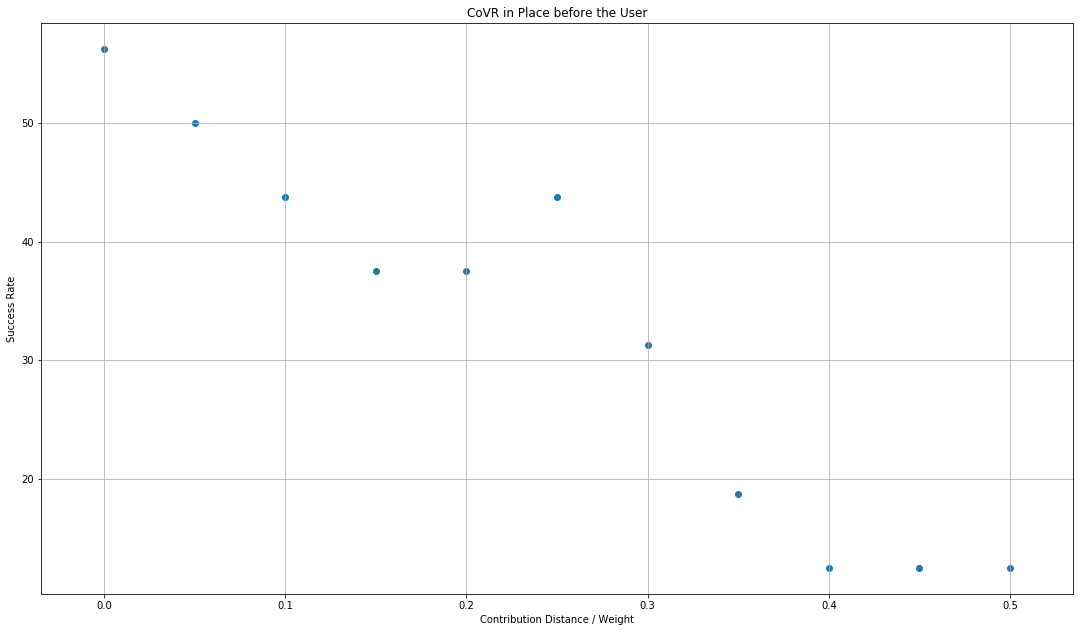

In [93]:
fig, axis = plt.subplots()
axis.set_xlabel('Contribution Distance / Weight')
axis.set_ylabel('Success Rate')
axis.set_title('CoVR in Place before the User')
axis.grid(True)
x = summaryPd.index
y = summaryPd['SuccessRate']

axis.scatter(x,y)
fig.set_size_inches(18.5, 10.5)

fig.savefig('./SummarySimulation/' + str(nbCibles) +'Cibles-Condition#'+ str(numCondition) +'-User#'+ name +'_MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%.png')
#axis.legend()
plt.show() 

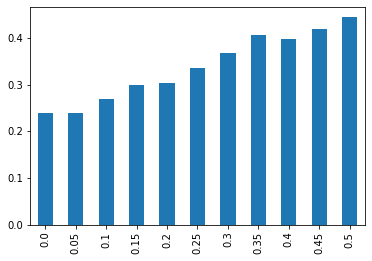

In [94]:
summaryPd['MeanDistanceTarget'].plot.bar()#yerr = summaryPd['StdDistanceTarget']/2)
#fig.savefig('./SummarySimulation/' + str(nbCibles) +'Cibles-Condition#'+ str(numCondition) +'-User#'+ name +'_MeanDistanceToTarget.png')


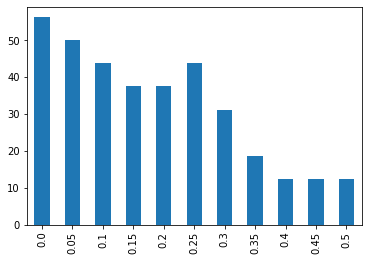

In [95]:
summaryPd['SuccessRate'].plot.bar()
#fig.savefig('./SummarySimulation/' + str(nbCibles) +'Cibles-Condition#'+ str(numCondition) +'-User#'+ name +'_BarChart-MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%.png')
